In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("RetailDataAnalysis").getOrCreate()


In [0]:

df = spark.read.option("header", "true").csv("dbfs:/FileStore/tables/Retail_Files/*.csv")

In [0]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)



In [0]:
df.createOrReplaceTempView("retail_data_tabel")

In [0]:
df_count=spark.sql('select COUNT(DISTINCT InvoiceNo)  AS TotalTransactions from retail_data_tabel')

In [0]:
df_count.show(truncate=False)

+-----------------+
|TotalTransactions|
+-----------------+
|25900            |
+-----------------+



In [0]:
df_total_value=spark.sql('select FORMAT_NUMBER(SUM(Quantity * UnitPrice), 2) AS TotalValue from retail_data_tabel')




In [0]:
df_total_value.show(truncate=False)


+------------+
|TotalValue  |
+------------+
|9,747,747.93|
+------------+



In [0]:
df_5_top_selling = spark.sql('SELECT StockCode, SUM(Quantity) AS TotalSold ' +
                            'FROM retail_data_tabel ' +
                            'GROUP BY StockCode ' +
                            'ORDER BY TotalSold DESC ' +
                            'LIMIT 5')

In [0]:
df_5_top_selling.show(truncate=False)

+---------+---------+
|StockCode|TotalSold|
+---------+---------+
|22197    |56450.0  |
|84077    |53847.0  |
|85099B   |47363.0  |
|85123A   |38830.0  |
|84879    |36221.0  |
+---------+---------+



In [0]:
df_5_topmost_valuable = spark.sql('SELECT StockCode, Description,CAST(SUM(Quantity * UnitPrice)AS DECIMAL(10, 2))  AS TotalValue ' +
                            'FROM retail_data_tabel ' +
                            'GROUP BY StockCode, Description ' +
                            'ORDER BY TotalValue DESC ' +
                            'LIMIT 5')

In [0]:
df_5_topmost_valuable.show(truncate=False)

+---------+----------------------------------+----------+
|StockCode|Description                       |TotalValue|
+---------+----------------------------------+----------+
|DOT      |DOTCOM POSTAGE                    |206245.48 |
|22423    |REGENCY CAKESTAND 3 TIER          |164762.19 |
|47566    |PARTY BUNTING                     |98302.98  |
|85123A   |WHITE HANGING HEART T-LIGHT HOLDER|97715.99  |
|85099B   |JUMBO BAG RED RETROSPOT           |92356.03  |
+---------+----------------------------------+----------+



In [0]:
df_country_and_totalValue = spark.sql('SELECT Country, CAST(SUM(Quantity * UnitPrice) AS DECIMAL(10, 2)) AS TotalValue ' +
                            'FROM retail_data_tabel ' +
                            'GROUP BY Country ' )
                            

In [0]:
df_country_and_totalValue.show(truncate=False)

+---------------+----------+
|Country        |TotalValue|
+---------------+----------+
|Sweden         |36595.91  |
|Germany        |221698.21 |
|France         |197403.90 |
|Greece         |4710.52   |
|Belgium        |40910.96  |
|Finland        |22326.74  |
|Malta          |2505.47   |
|Unspecified    |4749.79   |
|Italy          |16890.51  |
|EIRE           |263276.82 |
|Norway         |35163.46  |
|Spain          |54774.58  |
|Denmark        |18768.14  |
|Hong Kong      |10117.04  |
|Iceland        |4310.00   |
|Channel Islands|20086.29  |
|USA            |1730.92   |
|Switzerland    |56385.35  |
|Japan          |35340.62  |
|Poland         |7213.14   |
+---------------+----------+
only showing top 20 rows



/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [TotalValue] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


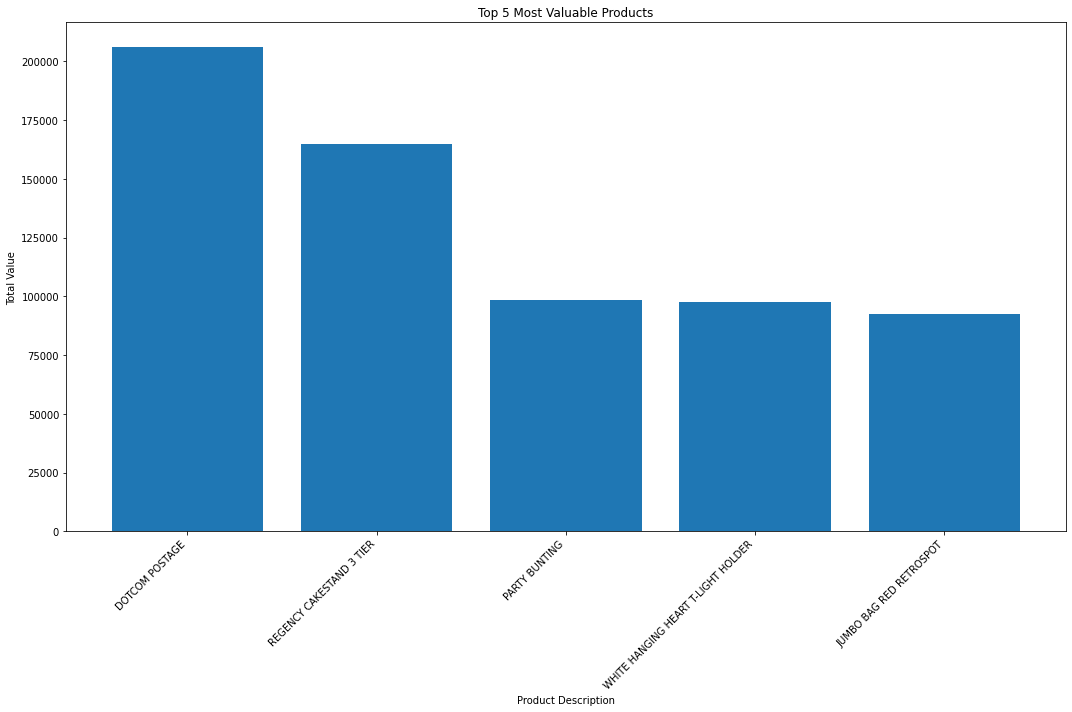

In [0]:

import matplotlib.pyplot as plt

df_pandas = df_5_topmost_valuable.toPandas()


plt.figure(figsize=(15, 10))
plt.bar(df_pandas['Description'], df_pandas['TotalValue'])
plt.xlabel('Product Description')
plt.ylabel('Total Value')
plt.title('Top 5 Most Valuable Products')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
